In [1]:
from haversine import haversine, Unit
from matplotlib import pyplot as plt
from clickhouse_driver import Client 
import json
import warnings
warnings.filterwarnings("ignore")
import numpy as np

with open("./clickhouse_host.json","r") as f:
    DB=json.loads(f.read())
client=Client(host=DB["ip"],user=DB["user"])


In [2]:
request_10_sensors="select value as "



median_sensors_0=client.execute('select toDayOfMonth(Timestamp) as Day, median(value) as "_2.5pm"'
                              +"from purple_air.sensors_telemetry where("
                              +"(toHour(Timestamp)=8) and toMonth(Timestamp)=1 "+ 
                              "and toMinute(Timestamp)=0 and parameter_name='2.5pm' and sensor_id != 88888) group by Timestamp order by Timestamp")
median_sensors_12=client.execute('select toDayOfMonth(Timestamp) as Day, median(value) as "_2.5pm"'
                              +"from purple_air.sensors_telemetry where("
                              +"(toHour(Timestamp)=16) and toMonth(Timestamp)=1 "+ 
                              "and toMinute(Timestamp)=0 and parameter_name='2.5pm' and sensor_id != 88888) group by Timestamp order by Timestamp")

median_sensors_AB_0=client.execute('select toDayOfMonth(Timestamp) as Day, value as "_2.5pm"'
                              +"from purple_air.sensors_telemetry where("
                              +"(toHour(Timestamp)=0) and toMonth(Timestamp)=1 "+ 
                              "and toMinute(Timestamp)=0 and parameter_name='median') order by Timestamp")
median_sensors_AB_12=client.execute('select toDayOfMonth(Timestamp) as Day, value as "_2.5pm"'
                              +"from purple_air.sensors_telemetry where("
                              +"(toHour(Timestamp)=12) and toMonth(Timestamp)=1 "+ 
                              "and toMinute(Timestamp)=0 and parameter_name='median') order by Timestamp")


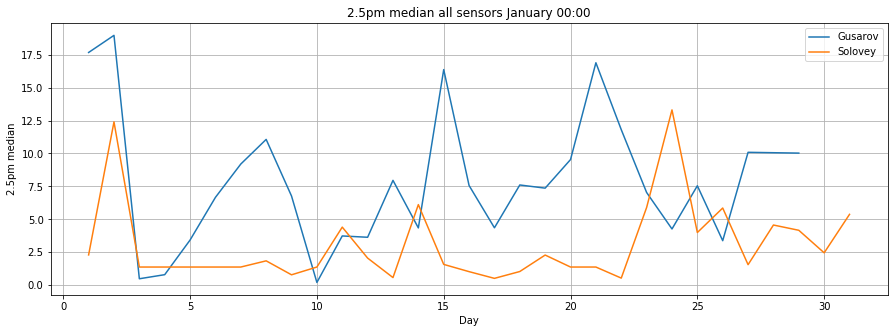

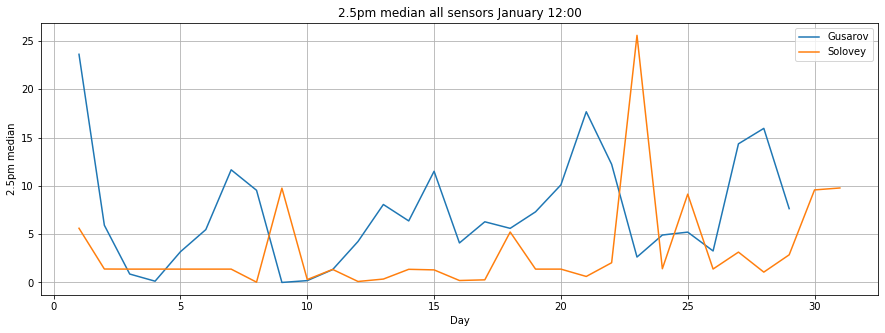

In [9]:
fig= plt.figure(figsize=[15,5])

time= [e[0] for e in median_sensors_0]
_0_clock=[e[1] for e in median_sensors_0]
plt.plot(time,_0_clock)

time= [e[0] for e in median_sensors_AB_0]
AB_0_clock=[e[1] for e in median_sensors_AB_0]
plt.plot(time,AB_0_clock)

plt.xlabel("Day")
plt.ylabel("2.5pm median")
plt.grid("True")
plt.legend(("Gusarov","Solovey"))
plt.title("January 00:00")
fig.show()
fig= plt.figure(figsize=[15,5])
time= [e[0] for e in median_sensors_12]
_12_clock=[e[1] for e in median_sensors_12]
plt.plot(time,_12_clock,)

time= [e[0] for e in median_sensors_AB_12]
AB_12_clock=[e[1] for e in median_sensors_AB_12]
plt.plot(time,AB_12_clock)


plt.xlabel("Day")
plt.ylabel("2.5pm median")
plt.grid("True")
plt.legend(("Gusarov","Solovey"))
plt.title("2.5pm median all sensors January 12:00")
fig.show()

In [4]:
from scipy.stats import mannwhitneyu, ttest_ind, ttest_1samp
orange_values = _0_clock
blue_values = _12_clock
print('ttest orange vs blue =%.3f, p=%.3f' % ttest_ind(orange_values, blue_values) )
print('MannWhitneyU orange vs blue =%.3f, p=%.3f' % mannwhitneyu(orange_values, blue_values))

ttest orange vs blue =1.329, p=0.189
MannWhitneyU orange vs blue =361.000, p=0.047


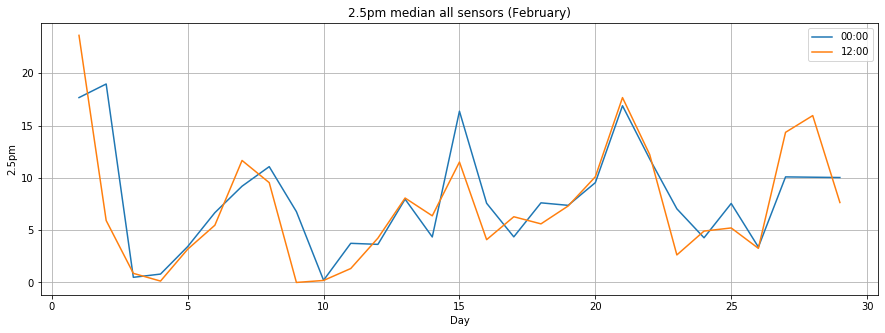

In [5]:
request_10_sensors="select value as "



median_sensors_0=client.execute('select toDayOfMonth(Timestamp) as Day, median(value) as "_2.5pm"'
                              +"from purple_air.sensors_telemetry where("
                              +"(toHour(Timestamp)=8) and toMonth(Timestamp)=2 "+ 
                              "and toMinute(Timestamp)=0 and parameter_name='2.5pm' and sensor_id != 88888) group by Timestamp order by Timestamp")
median_sensors_12=client.execute('select toDayOfMonth(Timestamp) as Day, median(value) as "_2.5pm"'
                              +"from purple_air.sensors_telemetry where("
                              +"(toHour(Timestamp)=16) and toMonth(Timestamp)=2 "+ 
                              "and toMinute(Timestamp)=0 and parameter_name='2.5pm' and sensor_id != 88888) group by Timestamp order by Timestamp")
fig= plt.figure(figsize=[15,5])
time= [e[0] for e in median_sensors_0]
_0_clock=[e[1] for e in median_sensors_0]
plt.plot(time,_0_clock)
time= [e[0] for e in median_sensors_12]
_12_clock=[e[1] for e in median_sensors_12]
plt.plot(time,_12_clock,)
plt.xlabel("Day")
plt.ylabel("2.5pm")
plt.grid("True")
plt.legend(("00:00","12:00"))
plt.title("2.5pm median all sensors (February)")
fig.show()

In [6]:
orange_values = _0_clock
blue_values = _12_clock
print('ttest orange vs blue =%.3f, p=%.3f' % ttest_ind(orange_values, blue_values) )
print('MannWhitneyU orange vs blue =%.3f, p=%.3f' % mannwhitneyu(orange_values, blue_values))

ttest orange vs blue =0.419, p=0.677
MannWhitneyU orange vs blue =361.000, p=0.239
